In [1]:
import torch
import torch.optim as optim

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

In [3]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

In [4]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

# 6.1

In [5]:
import math
print(math.tanh(-2.2)) # ゴミ収集車
print(math.tanh(0.1)) # クマ
print(math.tanh(2.5)) # イヌ

-0.9757431300314515
0.09966799462495582
0.9866142981514303


# 6.2
## 6.2.1

In [6]:
import torch.nn as nn

linear_model = nn.Linear(1, 1) # コンストラクタの引数を与える
linear_model(t_un_val)

tensor([[ 1.2022],
        [-0.1072]], grad_fn=<AddmmBackward0>)

In [7]:
# y = model(x) # このように記述すべき
# y = model.forward(x) # 動くけど危険

## 6.2.2

In [8]:
import torch.nn as nn

# 引数は入力サイズ、出力サイズ、バイアスで、バイアスはデフォルトで True
linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[-3.0349],
        [-1.3460]], grad_fn=<AddmmBackward0>)

In [9]:
linear_model.weight

Parameter containing:
tensor([[-0.4640]], requires_grad=True)

In [10]:
linear_model.bias

Parameter containing:
tensor([-0.3345], requires_grad=True)

In [11]:
x = torch.ones(1)
linear_model(x)

tensor([-0.7985], grad_fn=<AddBackward0>)

In [12]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-0.7985],
        [-0.7985],
        [-0.7985],
        [-0.7985],
        [-0.7985],
        [-0.7985],
        [-0.7985],
        [-0.7985],
        [-0.7985],
        [-0.7985]], grad_fn=<AddmmBackward0>)

In [13]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)
t_u.shape

torch.Size([11, 1])

In [14]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

In [15]:
linear_model.parameters()

<generator object Module.parameters at 0x1125f5af0>

In [16]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.1715]], requires_grad=True),
 Parameter containing:
 tensor([0.4602], requires_grad=True)]

In [17]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f}, Validation loss {loss_val.item():.4f}")

In [18]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
n_epochs = 3000,
optimizer = optimizer,
model = linear_model,
loss_fn = nn.MSELoss(), # 手書きで実装していた損失関数の代わり
t_u_train = t_un_train,
t_u_val = t_un_val,
t_c_train = t_c_train,
t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 269.8704, Validation loss 156.8502
Epoch 1000, Training loss 5.0406, Validation loss 1.1451
Epoch 2000, Training loss 3.1104, Validation loss 2.3068
Epoch 3000, Training loss 2.9516, Validation loss 3.8381

Parameter containing:
tensor([[5.5505]], requires_grad=True)
Parameter containing:
tensor([-18.5665], requires_grad=True)


誤差の範囲内だとは思う(訓練データとテストデータがランダム分割なので)

# 6.3
## 6.3.1

In [19]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13,1))
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

## 6.3.2

In [20]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [24]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [25]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ("hidden_linear", nn.Linear(1, 8)),
    ("hidden_activation", nn.Tanh()),
    ("output_linear", nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [26]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [27]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.2067], requires_grad=True)

In [28]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print("output", seq_model(t_un_val))
print("answer", t_c_val)
print("hidden", seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 226.4194, Validation loss 132.4871
Epoch 1000, Training loss 5.6222, Validation loss 0.6906
Epoch 2000, Training loss 3.8758, Validation loss 4.7103
Epoch 3000, Training loss 2.3811, Validation loss 4.7980
Epoch 4000, Training loss 1.9258, Validation loss 4.6169
Epoch 5000, Training loss 1.8141, Validation loss 4.5261
output tensor([[13.2620],
        [-1.8822]], grad_fn=<AddmmBackward0>)
answer tensor([[15.],
        [-4.]])
hidden tensor([[-5.7602e+00],
        [ 4.3449e+00],
        [ 1.7596e-01],
        [ 1.6672e-01],
        [-1.9023e-01],
        [ 6.0093e+00],
        [ 4.5265e+00],
        [ 3.6661e-03]])


## 6.3.3

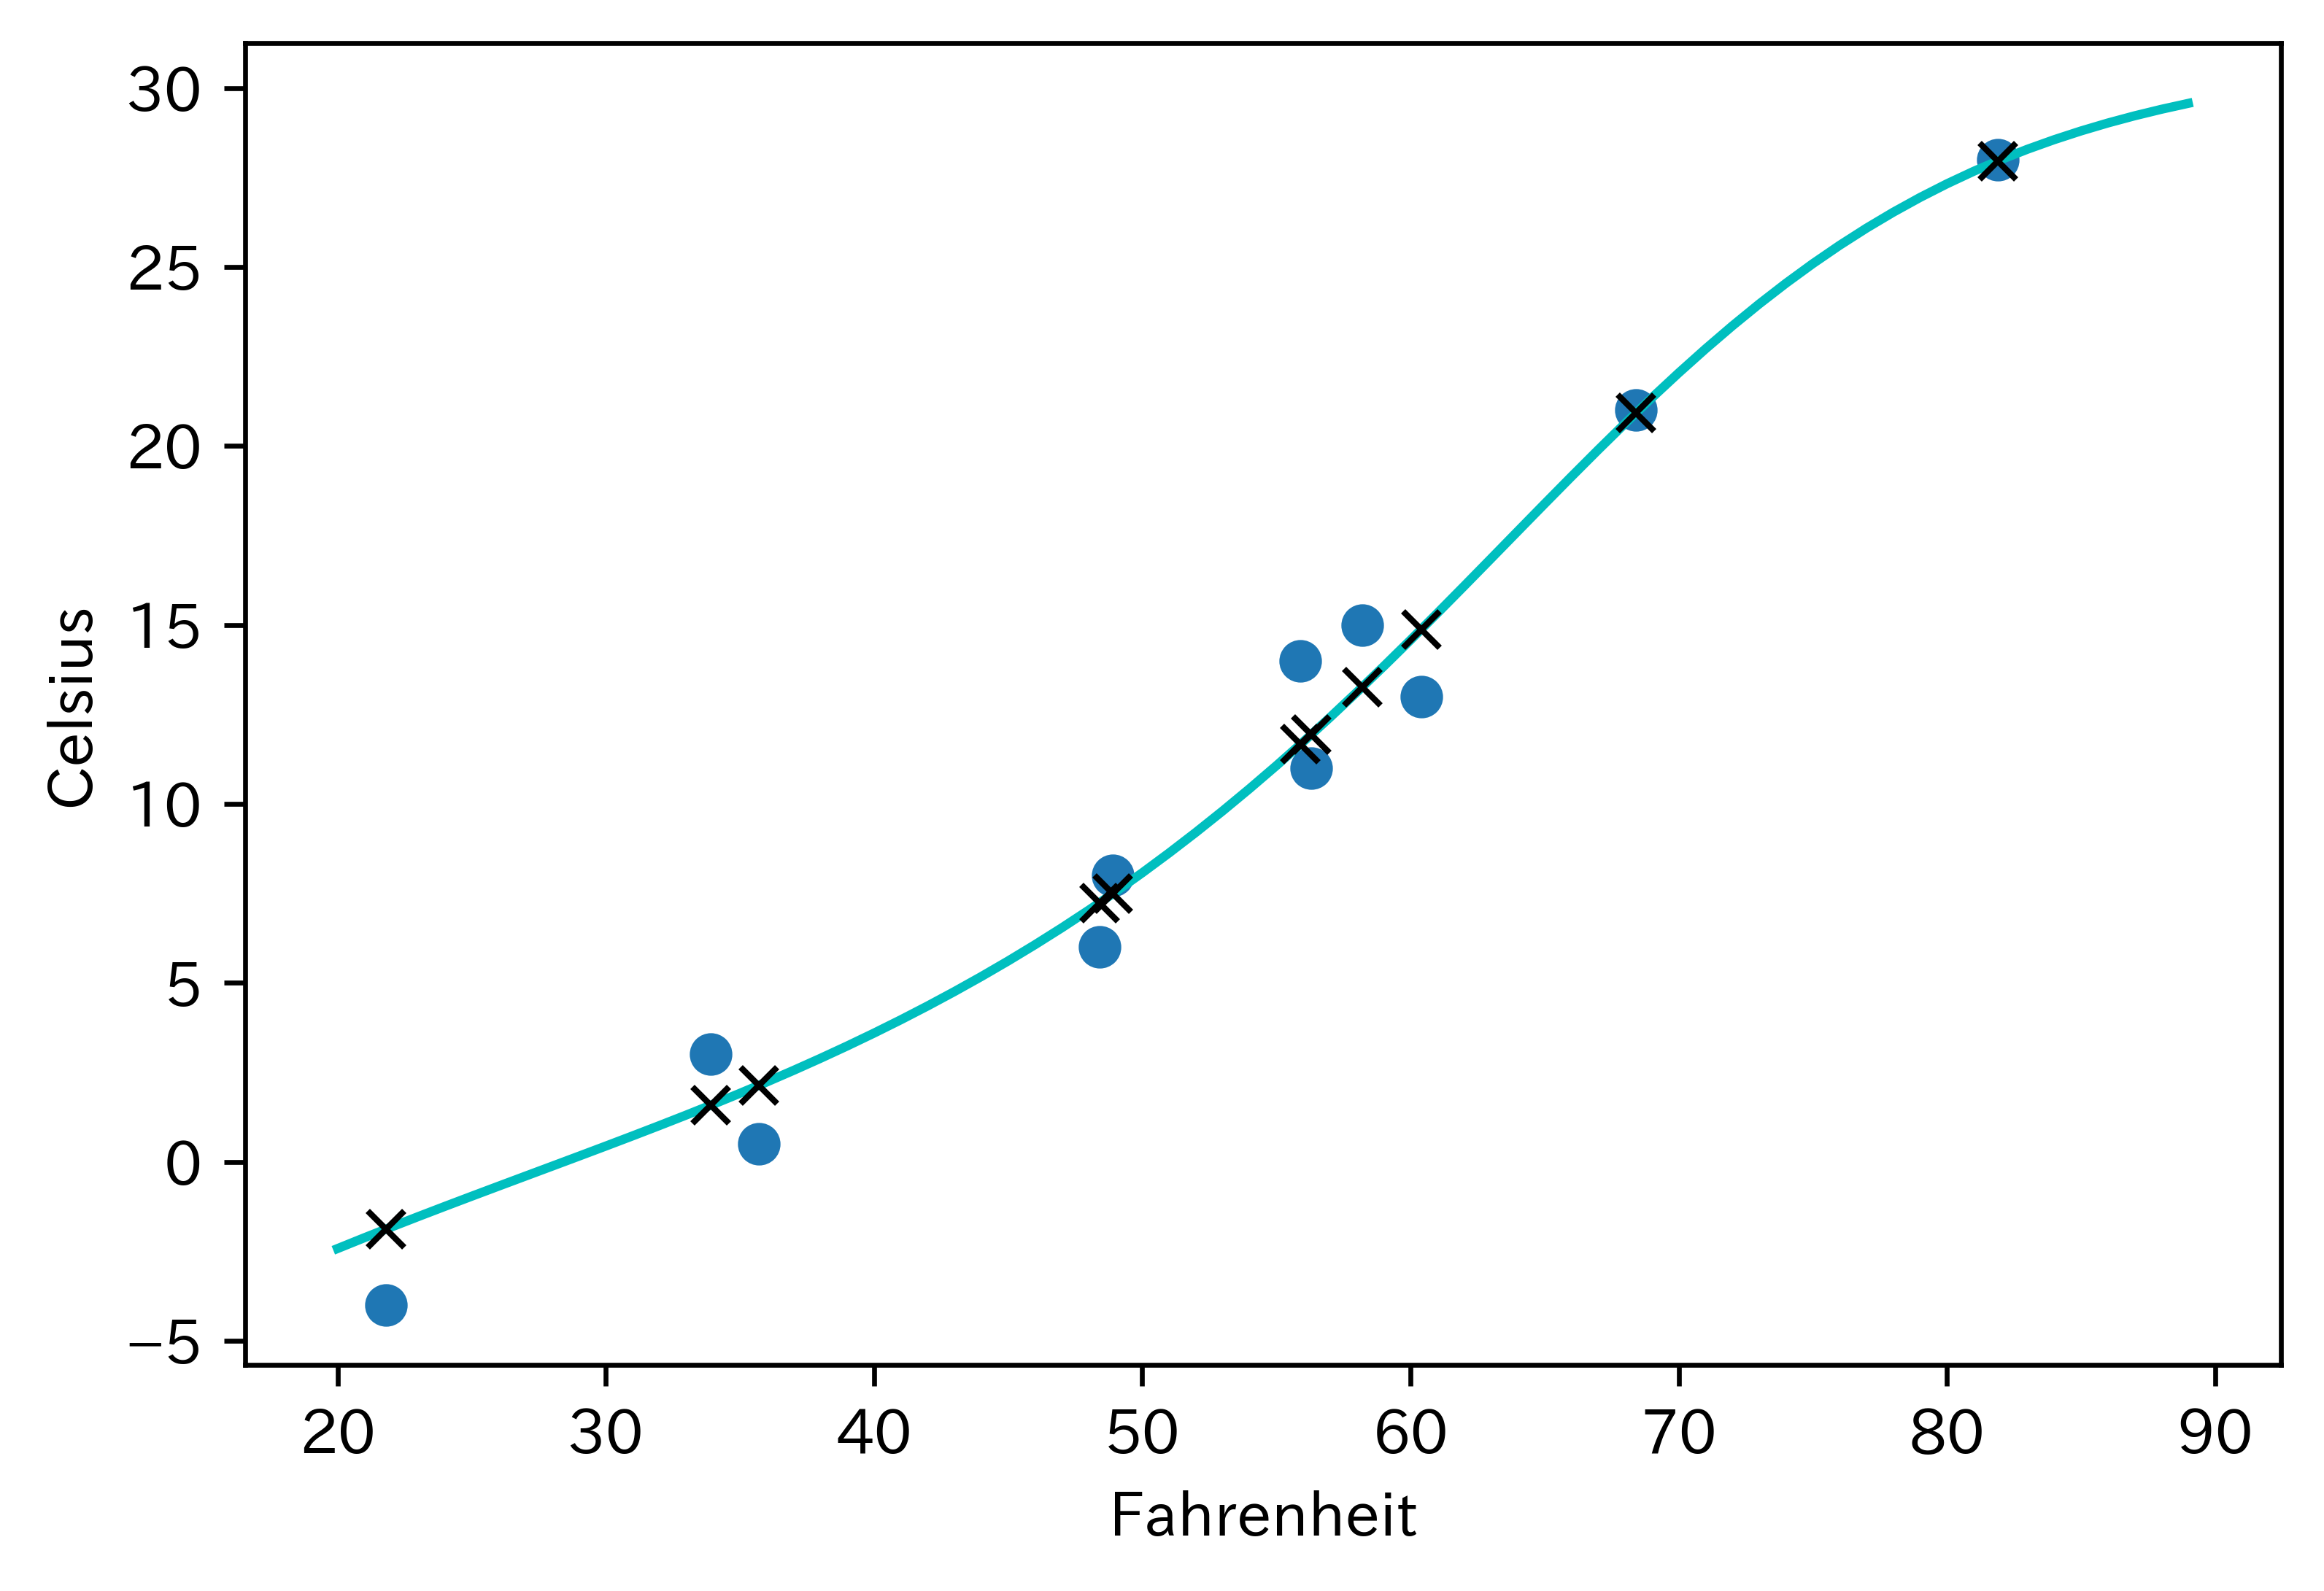

In [29]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)

plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(),  "o")
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), "c-")
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), "kx")